In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

In [19]:
# parsing through the data 
data1 = pd.read_csv("matlab_sim\data3.csv")
n1 = np.array([])
N1 = np.array([])
for i in range(66):
    n1 = np.append(n1, data1.n.iloc[i])
    N1 = np.append(N1, data1.N.iloc[i])

[  1.  11.  21.  31.  41.  51.  61.  71.  81.  91. 101. 111. 121. 131.
 141. 151. 161. 171. 181. 191. 201. 211. 221. 231. 241. 251. 261. 271.
 281. 291. 301. 311. 321. 331. 341. 351. 361. 371. 381. 391. 401. 411.
 421. 431. 441. 451. 461. 471. 481. 491. 501. 511. 521. 531. 541. 551.
 561. 571. 581. 591. 601. 611. 621. 631. 641. 651.]
[0.0000e+00 1.0000e+02 3.3700e+02 6.9700e+02 1.1720e+03 1.7560e+03
 2.4450e+03 3.2350e+03 4.1220e+03 5.1060e+03 6.1820e+03 7.3490e+03
 8.6050e+03 9.9480e+03 1.1376e+04 1.2889e+04 1.4484e+04 1.6161e+04
 1.7918e+04 1.9754e+04 2.1668e+04 2.3658e+04 2.5725e+04 2.7866e+04
 3.0082e+04 3.2371e+04 3.4732e+04 3.7165e+04 3.9668e+04 4.2242e+04
 4.4885e+04 4.7596e+04 5.0376e+04 5.3223e+04 5.6137e+04 5.9117e+04
 6.2162e+04 6.5273e+04 6.8448e+04 7.1687e+04 7.4989e+04 7.8354e+04
 8.1782e+04 8.5271e+04 8.8822e+04 9.2434e+04 9.6106e+04 9.9838e+04
 1.0363e+05 1.0748e+05 1.1139e+05 1.1536e+05 1.1939e+05 1.2347e+05
 1.2761e+05 1.3181e+05 1.3606e+05 1.4037e+05 1.4474e+05 1.491

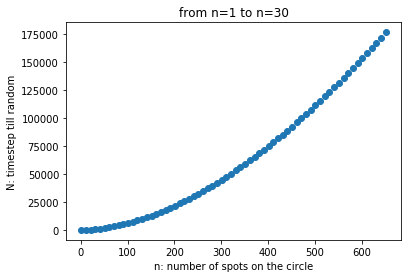

In [20]:
# plotting the figure 
plt.ion()
plt.figure()
plt.plot(n1, N1, 'o')
plt.title('from n=1 to n=30')
plt.xlabel('n: number of spots on the circle')
plt.ylabel('N: timestep till random')
plt.show()

## fit the figure to a function 

In [21]:
# compute the Mean square error of this fit 
def calculate_mse(f, a, b, xdata=n1, ydata=N1):
    mse = 0
    for i in range(len(xdata)):
        mse += (ydata[i] - f(xdata[i], a, b))**2
    mse = mse / len(xdata)
    return mse


# create a function to fit the data to a specific kind of function
def fit(f):
    # fit the data
    params, cov = curve_fit(f=f, xdata=n1, ydata=N1, p0=[1,1], bounds=(-np.inf, np.inf))
    std_deviation = np.sqrt(np.diag(cov))
    print('the parameter a, b are: ', params)
    print('the standard deviation of a, b are: ', std_deviation)
    # print('the covariance matrix of a, b is: ')
    # print(cov)

    # plot the fit
    plt.plot(n1, N1, 'o', label='data')
    plt.plot(n1, f(n1, params[0], params[1]), label='fit')
    plt.legend()

    # calculate the mean square error
    mse = calculate_mse(f, params[0], params[1])
    print('the mean square error is: ', mse)

### exponential growth

C:\Users\brave\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:766: RuntimeWarning: overflow encountered in square
  cost = np.sum(infodict['fvec'] ** 2)
C:\Users\brave\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
C:\Users\brave\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """


the parameter a, b are:  [-5.3281595e-14  1.0000000e+00]
the standard deviation of a, b are:  [inf inf]
the mean square error is:  inf


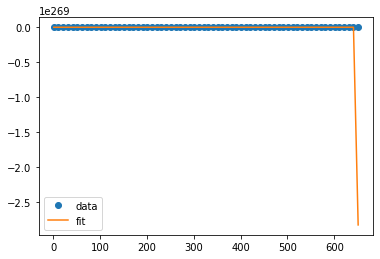

In [22]:
def exponential(x, a, b):
    return a * np.exp(b * x)  # y = a * e^(bx)

fit(exponential)

### power growth

the parameter a, b are:  [1.74801274 1.77921461]
the standard deviation of a, b are:  [0.01339617 0.00122217]
the mean square error is:  32355.992220450597


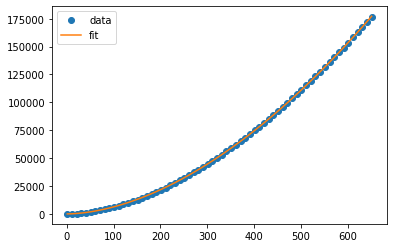

In [23]:
def power(x, a, b):
    return a * np.power(x, b)  # y = a * x^b

fit(power)